# Traffic Analysis

&nbsp; &nbsp; &nbsp; Average Daily Traffic counts are analogous to a census count of vehicles on city streets. There counts provide a close approximation to the actual number of vehicles passing through a given location on an average weekday. Since it is not possible to count every vehicle on every city street, sample counts are taken along streets to get an estimate of traffic on half-mile or one-mile street segments.<br /> 

&nbsp; &nbsp; &nbsp; Herein, I will perform data cleaning and feature engineering, analyze the traffic data to answer the required questions and try to explore more.

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Table of Contents
1. [Load Data](#load)
2. [Data Cleaning and Feature Engineering](#cleaning)
3. [Q1: What's the busiest street?](#street)
4. [Q2: What's the busiest month?](#month)
5. [Q3: Is there a busiest direction?](#direction)
6. [Q4: What else?](#else)  
  [Q4.1: What is the busiest street in the busiest month?](#4.1)  
  [Q4.2: What is the busiest street in the busiest direction?](#4.2)  
  [Q4.3: What is the busiest street in each direction?](#4.3)  
  [Q4.4: East-west direction vs. South-north direction?](#4.5)  
7. [Summary of Preprocessing Data](#summary)
8. [Results and Insights](#result)

<a id='load'></a>
### 1. Load Data

In [2]:
# load data
data = pd.read_csv('C:/Users/xiaoj/Downloads/Average_Daily_Traffic_Counts.csv')
data.head()

,ID,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location
0,2,1708 West,71st Street,3/9/2006,14600,East Bound: 6900 / West Bound: 7700,41.764877,-87.666635,"(41.764877, -87.666635)"
1,3,1275 West,71st Street,2/28/2006,16500,East Bound: 7800 / West Bound: 8700,41.765008,-87.657067,"(41.765008, -87.657067)"
2,5,920 West,71st Street,2/28/2006,18200,East Bound: 8800 / West Bound: 9400,41.765153,-87.647751,"(41.765153, -87.647751)"
3,6,758 West,71st Street,2/28/2006,21600,East Bound: 10400 / West Bound: 11200,41.765204,-87.644371,"(41.765204, -87.644371)"
4,7,240 East,71st St,2/28/2006,18300,East Bound: 9000 / West Bound: 9300,41.765644,-87.618476,"(41.765644, -87.618476)"


In [3]:
# check the null values and total data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1279 entries, 0 to 1278
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ID                                           1279 non-null   int64  
 1   Traffic Volume Count Location  Address       1279 non-null   object 
 2   Street                                       1279 non-null   object 
 3   Date of Count                                1279 non-null   object 
 4   Total Passing Vehicle Volume                 1279 non-null   int64  
 5   Vehicle Volume By Each Direction of Traffic  1279 non-null   object 
 6   Latitude                                     1279 non-null   float64
 7   Longitude                                    1279 non-null   float64
 8   Location                                     1279 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 90.1+ KB


It can be seen that the data is not big (only 1279) and also there are non-null values. However, there are several obvious problems:
- The features' names are too long to take easily;
- The type of "Date of Count" is object instead of date;
- Vehicle volumes in the opposite directions are recorded in the same column;
- Some of the streets' names are inconsistent, such as Street vs. St;

I will firstly deal with these problems and explore more.

<a id='cleaning'></a>
## 2. Data Cleaning and Feature Engineering

In [4]:
# check all the columns
data.columns

Index(['ID ', 'Traffic Volume Count Location  Address', 'Street',
       'Date of Count', 'Total Passing Vehicle Volume',
       'Vehicle Volume By Each Direction of Traffic', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [5]:
# rename the column names
data = data.rename(columns = {"ID ":"ID", 'Traffic Volume Count Location  Address':"Address", 'Date of Count':'Date', 'Total Passing Vehicle Volume':'Total', 'Vehicle Volume By Each Direction of Traffic':'Direction'})

# check the result after renmaing
data.head()

,ID,Address,Street,Date,Total,Direction,Latitude,Longitude,Location
0,2,1708 West,71st Street,3/9/2006,14600,East Bound: 6900 / West Bound: 7700,41.764877,-87.666635,"(41.764877, -87.666635)"
1,3,1275 West,71st Street,2/28/2006,16500,East Bound: 7800 / West Bound: 8700,41.765008,-87.657067,"(41.765008, -87.657067)"
2,5,920 West,71st Street,2/28/2006,18200,East Bound: 8800 / West Bound: 9400,41.765153,-87.647751,"(41.765153, -87.647751)"
3,6,758 West,71st Street,2/28/2006,21600,East Bound: 10400 / West Bound: 11200,41.765204,-87.644371,"(41.765204, -87.644371)"
4,7,240 East,71st St,2/28/2006,18300,East Bound: 9000 / West Bound: 9300,41.765644,-87.618476,"(41.765644, -87.618476)"


Checking the unique values can not only give us information about how many unique values of the feature has but also tell us which features can be used to count. From the following result, it can be found that the ID is unique feature for every data, which means it can be used to count when needed. 

In [6]:
# check the unique values of every feature
for i in data.columns:
    print("The nunique numbers of "+ i+ " is: " + str(data[i].nunique()))

The nunique numbers of ID is: 1279
The nunique numbers of Address is: 1203
The nunique numbers of Street is: 251
The nunique numbers of Date is: 95
The nunique numbers of Total is: 398
The nunique numbers of Direction is: 1223
The nunique numbers of Latitude is: 1272
The nunique numbers of Longitude is: 1275
The nunique numbers of Location is: 1276


In [7]:
# use the latitute and longitude to get the city information
import geocoder
def geo_rev(x):
    g=geocoder.osm([x['Latitude'], x['Longitude']],method = 'reverse').json
    if g:
        return g.get('city')
        
    else:
        return 'none'
data['city']=data[['Latitude','Longitude']].apply(geo_rev, axis=1)

In [8]:
# Check how many cities included
data['city'].value_counts()

Chicago    1266
Name: city, dtype: int64

In [9]:
# check the address of those with no city
data_no_city = data[data['city']!='Chicago']
for i in data_no_city['Location']:
    lat = i[1:-1].split(",")[0]
    long = i[1:-1].split(",")[1]
    print(i + ": " + geocoder.osm([lat,long], method = 'reverse').json.get('address'))

(41.692257, -87.720366): Breakfast Club, South Pulaski Road, Mount Greenwood, Oak Lawn, Lake Township, Cook County, Illinois, 60453, United States
(41.68508, -87.700584): Cash America Pawn, 11445, South Kedzie Avenue, Mount Greenwood, Merrionette Park, Worth Township, Cook County, Illinois, 60803, United States
(41.896495, -87.775191): Austin & Iowa SB, North Austin Boulevard, Ridgeland, Oak Park, Cook County, Illinois, 60302, United States
(41.908868, -87.804756): North & Harlem Plaza, West North Avenue, Oak Park, Cook County, Illinois, 60302, United States
(41.677257, -87.680696): 119th Street & Western, West 119th Street, Morgan Park, Blue Island, Calumet Township, Cook County, Illinois, 60406, United States
(41.735341, -87.693452): 2847, West 87th Street, Evergreen Park, Worth Township, Cook County, Illinois, 60805, United States
(41.987853, -87.846528): North East River Road, O'Hare, Park Ridge, Leyden Township, Cook County, Illinois, 60656, United States
(41.957636, -87.799463): 

It can be found from above information that those without city information are either township or park. Since there are only 13 data without city information, and the majority (98.98% = 1266 / 1279) of data belongs to Chicago city. I would like to focus this analysis on the city of Chicago.

In [10]:
data_chicago = data[data['city']=='Chicago'].reset_index(drop = True)

# drop some irrelevant columns
data_chicago = data_chicago.drop(['Location','city'],1)
data_chicago.head(3)

,ID,Address,Street,Date,Total,Direction,Latitude,Longitude
0,2,1708 West,71st Street,3/9/2006,14600,East Bound: 6900 / West Bound: 7700,41.764877,-87.666635
1,3,1275 West,71st Street,2/28/2006,16500,East Bound: 7800 / West Bound: 8700,41.765008,-87.657067
2,5,920 West,71st Street,2/28/2006,18200,East Bound: 8800 / West Bound: 9400,41.765153,-87.647751


In [11]:
# change the date type from object to datetime
data_chicago['Date'] = pd.to_datetime(data_chicago['Date'])

# build new feature of year, month and day 
data_chicago['year'] = data_chicago['Date'].dt.year
data_chicago['month'] = data_chicago['Date'].dt.month
data_chicago['day'] = data_chicago['Date'].dt.day_name()
data_chicago = data_chicago.drop('Date', 1)

# check and review the data 
data_chicago.head(3)

,ID,Address,Street,Total,Direction,Latitude,Longitude,year,month,day
0,2,1708 West,71st Street,14600,East Bound: 6900 / West Bound: 7700,41.764877,-87.666635,2006,3,Thursday
1,3,1275 West,71st Street,16500,East Bound: 7800 / West Bound: 8700,41.765008,-87.657067,2006,2,Tuesday
2,5,920 West,71st Street,18200,East Bound: 8800 / West Bound: 9400,41.765153,-87.647751,2006,2,Tuesday


In [12]:
# Check how many years included in the dataset
data_chicago['year'].value_counts()

2006    1257
2007       9
Name: year, dtype: int64

In [13]:
# Check how many street are counted and how many times counted
data_chicago[data_chicago['year']==2007].groupby('Street')['ID'].count()

Street
51st St             1
Canal St            1
Clinton St          1
Congress Pkwy       1
Dearborn St         1
Hollywood Ave       1
Milwaukee Ave       1
State St            1
Stony Island Ave    1
Name: ID, dtype: int64

From the above two information, it is easily to find that most of data were recorded in 2006, only 0.71 (9/1263) were recorded in 2007. And there are only 9 streets recorded, and each of them were recorded once. So, I would like to make the 2nd assumption. This project will only focus on **the city of Chicago in 2006**.

In [14]:
data_chicago_06 = data_chicago[data_chicago['year']== 2006]
data_chicago_06 = data_chicago_06.drop('year',1).reset_index(drop = True)
data_chicago_06.shape

(1257, 9)

In [15]:
# check the day of week distribution
data_chicago_06['day'].value_counts()

Tuesday      438
Thursday     350
Wednesday    335
Monday       128
Friday         5
Sunday         1
Name: day, dtype: int64

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

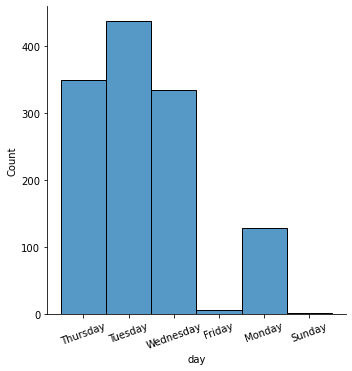

In [16]:
# visualization of day distribution
sns.displot(data_chicago_06['day'])
plt.xticks(rotation=20)

It can be found that most of the data were collected from Tues to Thurs, some were also collected on Monday. There are no data on Saturday and very few data on Friday and Sunday. I would like to focus on from Monday to Thursday in this project. Since they are working day. Since workday and weekend are really different for some streets, therefore if we want to invovle friday to sunday analysis, more data should be collected. 

In [17]:
data_chicago_06_day =data_chicago_06[data_chicago_06['day'].isin(['Monday','Tuesday','Wednesday','Thursday'])].reset_index(drop=True)
data_chicago_06_day.shape

(1251, 9)

In [18]:
# Split the 'Direction' features into four new features: two direction + corresponding volumes
pd.options.mode.chained_assignment = None 
data_chicago_06_day['0_direction'] = data_chicago_06_day['Direction'].str.split('/').str[0].str.split(':').str[0].str[:-6].str.strip()
data_chicago_06_day['0_volume'] = data_chicago_06_day['Direction'].str.split('/').str[0].str.split(':').str[1].astype(np.int64)
data_chicago_06_day['1_direction'] = data_chicago_06_day['Direction'].str.split('/').str[1].str.split(':').str[0].str[:-6].str.strip()
data_chicago_06_day['1_volume'] = data_chicago_06_day['Direction'].str.split('/ ').str[1].str.split(':').str[1].replace(np.nan, 0).astype(np.int64)
data_chicago_06_day = data_chicago_06_day.drop('Direction', 1)
data_chicago_06_day.head(3)

,ID,Address,Street,Total,Latitude,Longitude,month,day,0_direction,0_volume,1_direction,1_volume
0,2,1708 West,71st Street,14600,41.764877,-87.666635,3,Thursday,East,6900,West,7700
1,3,1275 West,71st Street,16500,41.765008,-87.657067,2,Tuesday,East,7800,West,8700
2,5,920 West,71st Street,18200,41.765153,-87.647751,2,Tuesday,East,8800,West,9400


In [19]:
# check what kinds of values included in '0_direction'
data_chicago_06_day['0_direction'].value_counts()

North    632
East     551
South     38
West      30
Name: 0_direction, dtype: int64

In [20]:
# check what kinds of values included in '1_direction'
data_chicago_06_day['1_direction'].value_counts()

South           607
West            523
                 52
Oneway South     38
Oneway West      30
Oneway North      1
Name: 1_direction, dtype: int64

It is know that there should be at most four directions. However, there are more special situations in feature['1_direction']. I will unify these values. For example, since the "0_direction" and "1_direction" are splitted from the previous feature "direction", they should always be the opposite. When the total volumes is same with the volumes in ["0_direction"], it means that volumes of the opposite direction is 0 and vice verse.

In [21]:
# unify the direction in "1_direction"
dic={'South':"North","North":"South","East":"West","West":"East"}

for i in range(1251):   
    if data_chicago_06_day.loc[i,'Total']==data_chicago_06_day.loc[i,"0_volume"]:
        data_chicago_06_day.loc[i,'1_volume'] = 0
    data_chicago_06_day.loc[i,'1_direction'] = dic[data_chicago_06_day.loc[i,"0_direction"]]
data_chicago_06_day['1_direction'].value_counts()

South    632
West     551
North     38
East      30
Name: 1_direction, dtype: int64

In [22]:
# Check the abbreviation of the name of "Street" 
data_chicago_06_day['Street'].str.split(' ').str[-1].value_counts()

Ave           590
St            400
Rd             85
Street         50
Dr             50
Blvd           43
Broadway        7
ST              3
Pkwy            3
Hwy             2
L               2
Ct              2
Plaisance       2
O               2
pass)           1
Plaissance      1
(lower)         1
Pl              1
PL              1
rd)             1
CT              1
RD              1
83rdStreet      1
II              1
Name: Street, dtype: int64

Based on above information, it is easily to found that there are some duplicate abbreviations and some name are not abbreviated as expected. All can be summarized as following:
- Street: St;
- ST: St;
- RD: Rd;
- CT: Ct;
- PL: Pl;
- Plaissance: Plaisance;
- Western Ave (over pass): Western Ave;
- Wacker Dr (lower):Wacker Dr;
- Western Ave (frontage rd):vWestern Ave
- 83rdStreet: 83rd St

In [24]:
# modify the abbreviations of streets
data_chicago_06_day['Street']=data_chicago_06_day['Street'].replace({"Western Ave (over pass)":"Western Ave","Wacker Dr (lower)":"Wacker Dr", "Western Ave (frontage rd)":"Western Ave", "Plaissance":"Plaisance"},regex=False)
data_chicago_06_day['Street']=data_chicago_06_day['Street'].replace({'Street':'St', "ST":"St","RD":"Rd","CT":"Ct","PL":"Pl"},regex = True)
data_chicago_06_day['Street']=data_chicago_06_day['Street'].apply(lambda s: s.replace("83rdSt","83rd  St"))
data_chicago_06_day['Street']=data_chicago_06_day['Street'].apply(lambda s: s.replace("Plaissance","Plaisance"))

data_chicago_06_day['Street'].str.split(' ').str[-1].value_counts()

Ave          592
St           454
Rd            86
Dr            51
Blvd          43
Broadway       7
Plaisance      3
Pkwy           3
Ct             3
Pl             2
Hwy            2
O              2
L              2
II             1
Name: Street, dtype: int64

In [26]:
data_chicago_06_day[data_chicago_06_day['Street'].str.split(' ').str[-1]=='L']

,ID,Address,Street,Total,Latitude,Longitude,month,day,0_direction,0_volume,1_direction,1_volume
132,156,9621 South,Avenue L,5000,41.720702,-87.536499,3,Tuesday,North,3200,South,1800
133,157,10129 South,Avenue L,4200,41.711118,-87.536485,3,Tuesday,North,2100,South,2100


In [27]:
data_chicago_06_day[data_chicago_06_day['Street'].str.split(' ').str[-1]=='O']

,ID,Address,Street,Total,Latitude,Longitude,month,day,0_direction,0_volume,1_direction,1_volume
688,751,11233 South,Avenue O,16000,41.690863,-87.540104,10,Wednesday,North,8100,South,7900
1177,1299,10928 South,Avenue O,12400,41.696434,-87.540090,10,Wednesday,North,7000,South,5400


In [28]:
# check the detailed information of "II"
data_chicago_06_day[data_chicago_06_day['Street'].str.split(' ').str[-1]=='II']

,ID,Address,Street,Total,Latitude,Longitude,month,day,0_direction,0_volume,1_direction,1_volume
341,375,2701 West,Pope John Paul II,7000,41.815579,-87.692019,5,Tuesday,West,7000,East,0


After checking the detailed information of streets name ending with "O", "L", "II", it is easily to find that these names are different format. But since there are no duplicate names with these names in the dataset, it is ok to leave it there. 

Until now, I have finished the basic data cleaning and feature engineering. Now the data can be used to do further analysis and answer the question. However, this does not mean the data is perfect, further data filtering are still needed according to the actural situation and requirement. Let's dive in.

<a id='street'></a>
## Q1: What is the busiest street?

In [29]:
# check the busiest street
data_chicago_06_day.groupby('Street')['Total'].sum().sort_values(ascending = False).head(1)

Street
Western Ave    1116100
Name: Total, dtype: int64

Based on all the data we have, it is easily to find that the busiest street is "Western Ave". However, since this is sample counts that will be taken to used to estimate the whole traffic in future, I have to check the counts distribution and if the sample is selected randomly as following.

In [30]:
# Street Vs. count times
data_chicago_06_day['Street'].value_counts()

Western Ave    33
Damen Ave      33
Ashland Ave    30
Halsted St     26
Pulaski Rd     26
               ..
Higgins Rd      1
92nd St         1
83rd Pl         1
109th St        1
57th Dr         1
Name: Street, Length: 229, dtype: int64

(0.0, 35.0)

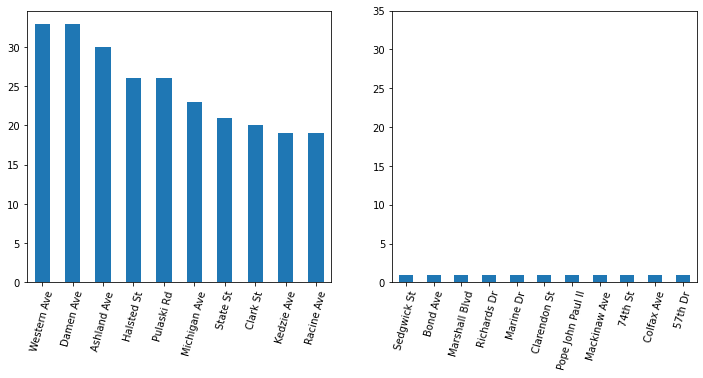

In [31]:
# visualization of streets's name Vs. Count numbers
fig,ax = plt.subplots(1,2,figsize=(12,5))

data_chicago_06_day['Street'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=75)

data_chicago_06_day['Street'].value_counts().sort_values(ascending=False).tail(11).plot(kind='bar',ax=ax[1])
plt.xticks(rotation=75)
plt.ylim(0,35)

From the above information, it is easily to find that streets are not counted randomly,for example, some streets are counted too many times compared with others, while some streets are only counted once,which has raise a severe **selection bias** problem.

In [32]:
# The distribution of count numbers of streets
import collections
street_counts = data_chicago_06_day['Street'].value_counts().sort_values(ascending=False).values
collections.Counter(street_counts)

Counter({33: 2,
         30: 1,
         26: 2,
         23: 1,
         21: 1,
         20: 1,
         19: 2,
         18: 1,
         17: 3,
         16: 1,
         15: 2,
         14: 3,
         13: 5,
         12: 5,
         11: 5,
         10: 7,
         9: 12,
         8: 7,
         7: 12,
         6: 13,
         5: 7,
         4: 12,
         3: 18,
         2: 25,
         1: 81})

Text(0, 0.5, 'Frequency')

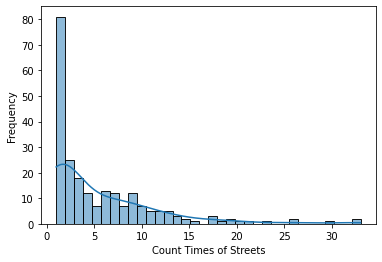

In [33]:
# Visulation of distribution of counts numbers of streets
sns.histplot(street_counts, kde=True,bins =34)
plt.xlabel('Count Times of Streets')
plt.ylabel('Frequency')

In [88]:
# Total data after we choose count time greater or equal 6
data_chicago_06_day.groupby('Street')['ID'].count()[data_chicago_06_day.groupby('Street')['ID'].count()>=6].values.sum()

983

In [ ]:
## find the threshold values of count times to get the maximum data, 
final_count = {}

# i is count times of street
for i in range(1,34):
    data_chicago_06_day_ = data_chicago_06_day.groupby('Street')['ID'].count()[data_chicago_06_day.groupby('Street')['ID'].count()>=i]
    # how many data I can get when I set i as count times 
    final_count[i] = i * data_chicago_06_day_.shape[0]
    
# to get the maximum data, which count times should be chose 
print("The best count times of the streets is: %d"%max(final_count, key=final_count.get))
print("The maximum data we can use is: %d" %max(final_count.values()))

In [362]:
final_count = {}

# i is count times of street
for i in range(1,34):
    data_chicago_06_day_ = data_chicago_06_day.groupby('Street')['ID'].count()[data_chicago_06_day.groupby('Street')['ID'].count()>=i]
    # how many data I can get when I set i as count times 
    final_count[i] = i * data_chicago_06_day_.shape[0]
    
# to get the maximum data, which count times should be chose 
print("The best count times of the streets is: %d"%max(final_count, key=final_count.get))
print("The maximum data we can use is: %d" %max(final_count.values()))

The best count times of the streets is: 12
The maximum data we can use is: 1032


In [361]:
data_chicago_06_day_ = data_chicago_06_day.groupby('Street')['ID'].count()[data_chicago_06_day.groupby('Street')['ID'].count()>=6]
data_chicago_06_day_.shape[0]

123

Text(0, 0.5, 'Amounts of Data')

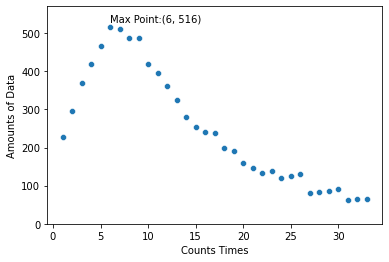

In [64]:
# Visualization of the relationship between count times and maximum data we can use
x = np.array(list(final_count.keys()))
y = np.array(list(final_count.values()))
sns.scatterplot(x=x,y=y)

xmax = x[np.argmax(y)]
ymax = y.max()

plt.text(xmax,ymax+15,'Max Point:(6, 516)')
plt.ylim(0, 570)
plt.xlabel('Counts Times')
plt.ylabel('Amounts of Data')

Based on the above analysis, to get the most data and avoid data waste, I would choose 6 as the count times, which means only those strees that were recorded 6 times would be chosen for further analysis. And for those whose records history were less than 6 will be dropped, and for those whose records history were greater than 6, 6 records will be randomly chose from their total count times records. For example, "Western Ave" was found to be the most busiest street, because it was counted 33 times, which brought the selection bias problem. To deal with this problem, only 6 were selected randomly from 33.

In [78]:
data_chicago_06_day_street = data_chicago_06_day.groupby('Street')['ID'].count()[data_chicago_06_day.groupby('Street')['ID'].count()>=6]
data_chicago_06_day_street

Street
103rd St          9
111th St          6
26th St           8
31st St          16
35th St           8
                 ..
Wacker Dr         6
Washington St    13
Wells St         10
Wentworth Ave     6
Western Ave      33
Name: ID, Length: 86, dtype: int64

In [79]:
# get the dataset in which every street are counted 6 times
data_chicago_06_day_str = data_chicago_06_day[data_chicago_06_day['Street']=="103rd St"].sample(6,random_state=42)

for i in data_chicago_06_day_street.index[1:]:
    new = data_chicago_06_day[data_chicago_06_day['Street']==i].sample(6,random_state=42)    
    data_chicago_06_day_str = pd.concat([new, data_chicago_06_day_str])
    
data_chicago_06_day_str.shape

(516, 12)

It can be found that after dealing with the selection bias problem of street, the amount of data has decresed from 1251 to 512, which means that only about 41% of the original data can be used.

In [288]:
# the busiest street
data_chicago_06_day_str.groupby('Street')['Total'].sum().sort_values(ascending = False).head(3)

Street
Stony Island Ave    326100
Cicero Ave          258000
Cumberland Ave      244000
Name: Total, dtype: int64

In [218]:
# get the dataset in which every street counted 6 times but the random_state were dropped
data_chicago_06_day_str = data_chicago_06_day[data_chicago_06_day['Street']=="103rd St"].sample(6)

for i in data_chicago_06_day_street.index[1:]:
    new = data_chicago_06_day[data_chicago_06_day['Street']==i].sample(6)    
    data_chicago_06_day_str = pd.concat([new, data_chicago_06_day_str])
    
data_chicago_06_day_str.groupby('Street')['Total'].sum().sort_values(ascending = False).head(3)

Street
Stony Island Ave    326100
Cicero Ave          258000
Cumberland Ave      244000
Name: Total, dtype: int64

In [219]:
# get the dataset in which every street are counted 10 times
data_chicago_06_day_street_2 = data_chicago_06_day.groupby('Street')['ID'].count()[data_chicago_06_day.groupby('Street')['ID'].count()>=10]

data_chicago_06_day_str_2 = data_chicago_06_day[data_chicago_06_day['Street']=="31st St"].sample(10)

for i in data_chicago_06_day_street_2.index[1:]:
    new = data_chicago_06_day[data_chicago_06_day['Street']==i].sample(10)    
    data_chicago_06_day_str_2 = pd.concat([new, data_chicago_06_day_str_2])
    
data_chicago_06_day_str_2.groupby('Street')['Total'].sum().sort_values(ascending = False).head(3)

Street
Cicero Ave        375600
Irving Park Rd    350000
Ashland Ave       343700
Name: Total, dtype: int64

In [220]:
# get the dataset in which every street are counted 18 times
data_chicago_06_day_street_3 = data_chicago_06_day.groupby('Street')['ID'].count()[data_chicago_06_day.groupby('Street')['ID'].count()>=18]

data_chicago_06_day_str_3 = data_chicago_06_day[data_chicago_06_day['Street']=="Ashland Ave"].sample(18)

for i in data_chicago_06_day_street_3.index[1:]:
    new = data_chicago_06_day[data_chicago_06_day['Street']==i].sample(18)    
    data_chicago_06_day_str_3 = pd.concat([new, data_chicago_06_day_str_3])
    
data_chicago_06_day_str_3.groupby('Street')['Total'].sum().sort_values(ascending = False).head(3)

Street
Western Ave    592400
Ashland Ave    573200
Pulaski Rd     525200
Name: Total, dtype: int64

**Answer to Q1:**

Based on the current 516 data, when I set the count times to be 6, **the busiest street on workday in Chicago in 2006 is "Stony Isaland Ave"**, which was only relatively stable. Since the sample are selected randomly, when I chose another sample from the same street, there are great possibilities that both the busiest and second busiest streets changed. 

When I increased the **count times to be 10**, the busiest street will change to be **"Cicero Ave"** and when I further increased the **count times to be 18**, the busiest street will then change to be **"Western Ave"**. 


And when count times is larger than 10,both the busiest and second busiest streets are relatively more stable and change little compared with when count times to be 6. So, this further demonstrated the importance of count times, **the more the count times is, the data is more statistical significance and the busiest data will be more stable**.

If more data can be collected, such as more data on weekend and specific count times for every street, we can get more further analysis. For example, we can know what is the busiest street on workday and weekend, what is the busiest time in a day, what is the busiest season in a year, how the traffic changed compared with the same time in the last year etc..

<a id='month'></a>
## Q2: What is the busiest month?

In [229]:
data_chicago_06_day_str['month'].value_counts()

10    153
8      99
3      95
9      92
11     31
4      25
5      13
2       6
12      2
Name: month, dtype: int64

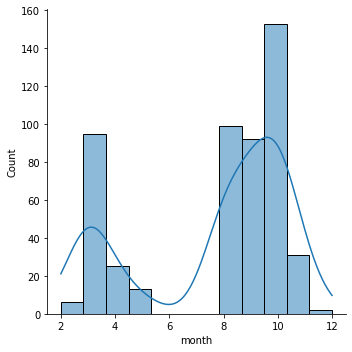

In [231]:
sns.displot(data_chicago_06_day_str['month'],bins =12,kde=True)

Since the counts are not distributed uniformly in each month, most were collected in Mar., Aug., Sep., and Oct., to avoid selection bias which can bring false result, I would like to choose these four month as representatve and check which month is the busiest. However, since the count times in these 4 monthes also showed some difference, such as the count numbers in March are nearly 62% of that in Oct., to avoid the possible selection bias, I would like to choose 100 randomly from Oct.

In [241]:
# due to the selection bias of month, I will only choose the busiest month from 3,8,9,10
data_chicago_06_day_str_month = data_chicago_06_day_str[data_chicago_06_day_str['month'].isin([3,8,9,10])]
data_chicago_06_day_str_month.shape

(439, 12)

In [242]:
# due to too much data in oct, I will randomly choose 100 from 153 data
data_chicago_06_day_str_10 = data_chicago_06_day_str[data_chicago_06_day_str['month']==10].sample(100)

data_chicago_06_day_str_mon = pd.concat([data_chicago_06_day_str[data_chicago_06_day_str['month'].isin([3,8,9])],data_chicago_06_day_str_10])
data_chicago_06_day_str_mon.shape

(386, 12)

In [251]:
# the busiest month 
data_chicago_06_day_str_mon.groupby('month')["Total"].sum().sort_values(ascending = False)

month
8     2414000
10    2008600
3     1754600
9     1557300
Name: Total, dtype: int64

**Answer to Q2:**

Due to the shortage of data and severe selection bias problem, the busiest month currently can only be chosen from 3,8,9 and 10. Finally, it was found that the busiest month of chicago on workday in 2006 is August on workday in Chicago in 2006.

<a id='direction'></a>
## Q3: Which direction is the busiest one(N,S,E,W)?

In [245]:
# rename the dataframe to make it easier to handle
data_final = data_chicago_06_day_str

(516, 12)

In [246]:
# concatenate the "0_direction" and "1_direction"
data_final_0 = data_final.drop(['1_direction',"1_volume"],axis=1)
data_final_0 = data_final_0.rename(columns = {'0_direction':"direction","0_volume":"volume"})

data_final_1 = data_final.drop(['0_direction',"0_volume"],axis=1)
data_final_1 = data_final_0.rename(columns = {'1_direction':"direction","1_volume":"volume"})

data_final_dir = pd.concat([data_final_0,data_final_1])
data_final_dir.shape

(1032, 10)

In [247]:
# get the busiest direction
data_final_dir.groupby('direction')['volume'].sum().sort_values(ascending = False)

direction
East     5060600
North    4852000
West      363800
South     351400
Name: volume, dtype: int64

**Answer to Q3:**

The busiest direction on the workday in Chicage in 2006 is the East direction.

<a id='else'></a>
## Q4: Which else?
- What is the busiest street in the busiest month?
- What is the busiet street in the busiest direction?
- What is the busiest street in each direction?
- What's the situation when compared east-west direction with south-north direction?

<a id='4.1'></a>
### Q4.1: What is the busiest street in the busiest month?

In [258]:
# the busiest street in the busiest month
data_chicago_06_day_str_8 = data_chicago_06_day_str_mon[data_chicago_06_day_str_mon['month']==8]
data_chicago_06_day_str_8.groupby('Street')['Total'].sum().sort_values(ascending = False).head(3)

Street
Fullerton Ave     165300
Irving Park Rd    158800
Devon Ave         151100
Name: Total, dtype: int64

**Answer to Q4.1:**

The busiest street in the busiest month on weekday in Chicago in 2006 is "Fullerton Ave".

<a id='4.2'></a>
### Q4.2: What is the busiest street in the busiest direction?

In [262]:
# the busiest street is "east"
data_final_dir[data_final_dir['direction']=='East'].groupby('Street')['volume'].sum().sort_values(ascending = False).head(3)

Street
North Ave         210400
Irving Park Rd    210000
Fullerton Ave     201000
Name: volume, dtype: int64

**Answer to Q4.2:**

The busiest street in the busiest direction on weekday in Chicago in 2006 is "North Ave".

<a id='4.3'></a>
### Q4.3: What is the busiest street in each direction?

In [281]:
# top 3 busiest streets in each direction
pd.DataFrame(data_final_dir.groupby(['direction',"Street"])['volume'].sum()).sort_values(['direction','volume'],ascending = False).groupby('direction').head(3)

volume
direction Street                  
West      Randolph St       140600
          Adams St          117400
          Madison St         69000
South     Clark St          176400
          Wells St           85200
          Wabash Ave         74200
North     Stony Island Ave  346400
          Cicero Ave        259000
          Cumberland Ave    244400
East      North Ave         210400
          Irving Park Rd    210000
          Fullerton Ave     201000

<a id='4.4'></a>
### Q4.4: What's the situation when compared East-West direction with South-North direction?

In [285]:
# dataset in east-west direction
data_final_ew = data_final_dir[(data_final_dir['direction']=='East') | (data_final_dir['direction']=='West')]
data_final_ew['volume'].sum()

5424400

In [286]:
# dataset in south-north direction
data_final_sn = data_final_dir[(data_final_dir['direction']=='South') | (data_final_dir['direction']=='North')]
data_final_sn['volume'].sum()

5203400

**Answer to Q4.4:**

The East-West direction is busier than those in South-North direction.

<a id='summary'></a>
## Summary of Preprocessing Data

According to the above analysis, I have performed the following to prepare the data:

1). Cleaning the data
- Convert the data type;
- Replace the NaN values using 0 instead of dropping them;
- Split the string to get the specific information;
- Unify the abbreviation names in the feature;


2). Engineering feature
- Convert the latitude and longitude to detailed city or address;
- Transfer date to the year, month and day;
- Split the feature to get more detailed information;
- Concatenate the direction feature in the same column;


3). Dealing with selection bias

- There are a lot of selection bias problems in this dataset, such as city, year, month, day, street etc. 


- For some of them, it is easier to just keep the majority data since very few data differed from them. For example, I prefer this traffic analysis will focus on Chicago instead of Cook County since 99 % data belongs to the city of Chicago. And I also choose the study will be in 2006 since less than 1% data belonged to 2007. And I also choose this analysis will only focus on workday since there are less than 0.5% data focusing on weekend. 


- Then to get better understanding of the data, the distribution of street count times were studied. I randomly choose parts of streets count times to avoid the streets selection bias problem.

<a id='result'></a>
## Results and Insights

In this project, I processed the traffic data and analyzed city, year, month, day and streets distribution etc.. The listed questions have been successfully answered as above. At the same time I also explored 4 more questions (also listed as above).

Herein, I will demonstrate other findings and insights I got from the data. The data has severe **selection bias** problems. For example, most data were collected from Tuesday to Thursday, some were from Monday, but there are no data on Saturday. Because weekday and weekend are especially important for traffic data. So such day distribution easily brought bias to Tuesday, Wednesday and Thursday. Currently, I combined all them together as workday. But if more data on Friday, Saturday and Sunday can be collected. That will give more accurate analysis, which means we can not only get the traffic situation on workday and weekend, but on spefic workday and time.

The month also has the same problem with the day. Most data are concentrated on March, August, September and October. So, the analysis about the busiest month is actually not reliable enough. Although I dealt with using randomly selecting sample, the main problem there is not enough data. The streets distribution showed the most serious selection bias problem. Some of streets were counted more than 30 times where others were only counted once, which brought great bias to some streets. I analyzed the count times distribution and dropped those streets whose counts times were little and randomly selected some sample from those counted too much. To some extent, this can reduce the selection bias problems. But getting more data and relatively almost same count times for each street is important to get more accurate analysis.

If we can get more data, I think there are many other important things we can do. Firstly, we can analyze the effects of month, day, time on the traffic. Then, we can combined the factors together, and get deeper insights.

-- END --